In [109]:
"""
Copyright 2021 Huawei Technologies Co., Ltd

CREATED:  2020-6-04 20:12:13
MODIFIED: 2022-01-29 15:48:45
"""
# -*- coding:utf-8 -*-
import cv2

from acl_model import Model
from PIL import Image

In [110]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [111]:
device_id = 0
model_path = "model/blazefaceback.om"

In [112]:
model = Model(device_id, model_path)

[ACL] init resource stage:
[ACL] init resource stage success
[Model] class Model init resource stage:
[Model] create model output dataset:
[Model] create model output dataset success
model input size 1
input  0
model input dims ({'name': 'x.1', 'dimCount': 4, 'dims': [1, 3, 256, 256]}, 0)
model input datatype 0
model output size 2
output  0
model output dims ({'name': 'Concat_261:0', 'dimCount': 3, 'dims': [1, 896, 16]}, 0)
model output datatype 0
output  1
model output dims ({'name': 'Concat_250:0', 'dimCount': 3, 'dims': [1, 896, 1]}, 0)
model output datatype 0
[Model] class Model init resource stage success
[Model] class Model release source success
[ACL] class Sample release source success


In [113]:
img_path = "data/test2.jpg"
anchors_path = "data/anchors.npy"

# read image
img_bgr = cv2.imread(img_path)

In [114]:
bboxes, landmarks = model.run(img_bgr, anchors_path)

[PreProc] img_resized shape (3, 256, 256)
[PreProc] image_np_expanded shape (1, 3, 256, 256)
[ACL] img_host_ptr, img_buf_size:  94555824736832 786432
[ACL] img_dev_ptr, img_buf_size:  18143025037312 786432
[Model] create model input dataset:
[Model] create model input dataset success
[Model] execute stage:
[Model] execute stage success
[INFO] detection done!
[Result] image runtime : 0.026


In [115]:
# draw bounding boxes and keypoints
i = 0
for bboxe in bboxes:
    cv2.rectangle(img_bgr, tuple(bboxe[2:]), tuple(bboxe[:2]), (0,0,255), 2)
    
    for landmark in landmarks[i]:
        cv2.circle(img_bgr, landmark, 3, (255,0,0), -1)
    i += 1

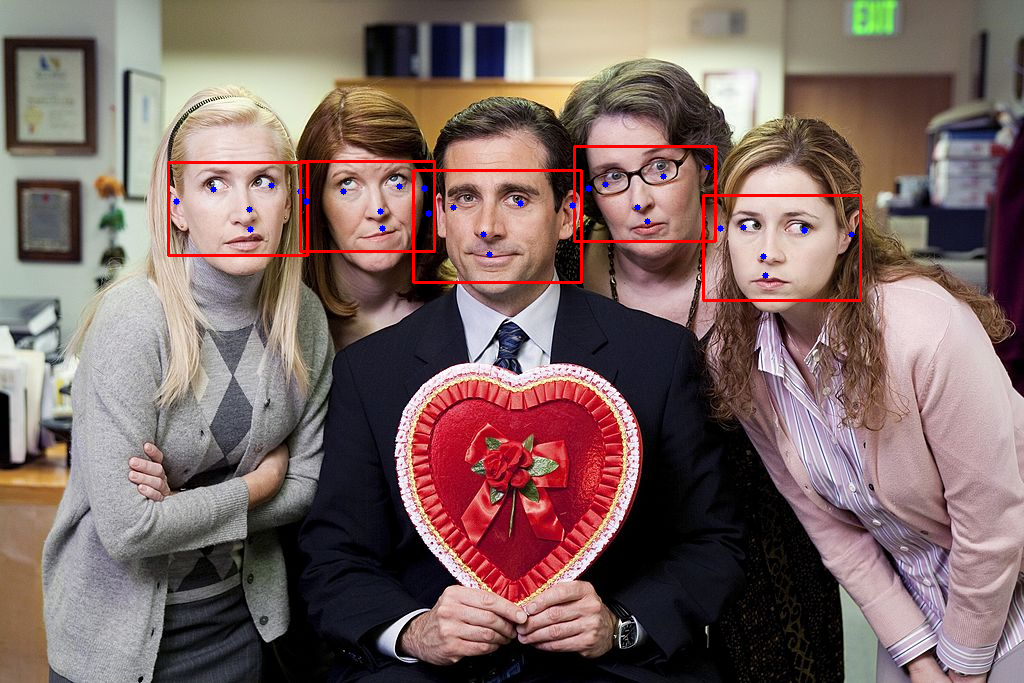

In [116]:
Image.fromarray(img_bgr[:,:,::-1])